# Indian Agricultural dataset
    -- shape: (246091, 7)
    -- fields:
        . State_Name
        . District_Name
        . Crop_Year
        . Season
        . Crop
        . Area: in Hectares
        . Producion: in Tonnes
       
    -- description:
        the data refers to the agricultural produce in India of varying regions and climatic conditions
    -- source:
        data.gov.in
        

In [1]:
# importing key libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.express as px

In [3]:
sns.set(color_codes = True)

In [6]:
file = 'data/apy.csv'
df = pd.read_csv(file, na_values = "=")

In [7]:
df.shape

(246091, 7)

In [8]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242364 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


Production is in tonnes and hence the dtype must not be object

In [7]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
def strip_spaces(x):
    return x.strip(' ')

In [10]:
df.Season = df.Season.apply(strip_spaces)

In [11]:
df.Crop = df.Crop.apply(strip_spaces)

In [12]:
df.State_Name = df.State_Name.apply(strip_spaces)
df.District_Name = df.District_Name.apply(strip_spaces)

In [13]:
df.isna().any()

State_Name       False
District_Name    False
Crop_Year        False
Season           False
Crop             False
Area             False
Production        True
dtype: bool

In [14]:
df.Production.isna().sum()

3727

In [15]:
df.Crop.unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard', 'Mesta',
       'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Sannhamp',
       'Var

In [9]:
len(df.Crop.unique())

124

In [13]:
crops = df.Crop.unique()[60:75]
crops

array(['Pome Granet', 'Sapota', 'Cabbage', 'Peas  (vegetable)',
       'Niger seed', 'Bottle Gourd', 'Sannhamp', 'Varagu', 'Garlic',
       'Ginger', 'Oilseeds total', 'Pulses total', 'Jute',
       'Peas & beans (Pulses)', 'Blackgram'], dtype=object)

In [10]:
len(df.Crop.unique())

124

In [18]:
len(df.District_Name.unique())

646

## redundant data

In [16]:
tot = df[(df.Crop == 'Total foodgrain')|(df.Crop == 'Oilseeds total')|(df.Crop == 'Pulses total')]

In [17]:
tot.Season.unique()

array(['Whole Year', 'Kharif', 'Rabi', 'Summer'], dtype=object)

In [16]:
tot.shape

(880, 7)

In [17]:
tot.sample(4)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
139899,Meghalaya,EAST KHASI HILLS,1997,Whole Year,Oilseeds total,257.0,191.0
141616,Meghalaya,WEST KHASI HILLS,1997,Rabi,Pulses total,20.0,20.0
10623,Arunachal Pradesh,KURUNG KUMEY,2002,Whole Year,Oilseeds total,380.0,320.0
180941,Tamil Nadu,KANNIYAKUMARI,1998,Kharif,Pulses total,3250.0,1511.0


removing total foodgrain and oilseeds total

In [18]:
df = df[(df.Crop != 'Total foodgrain')&(df.Crop != 'Oilseeds total')&(df.Crop != 'Pulses total')]

In [13]:
df.Season.unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

In [20]:
df.Crop_Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015])

In [50]:
df.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [376]:
len(df.State_Name.unique())

33

In [377]:
len(df.District_Name.unique())

646

In [21]:
df.shape

(245211, 7)

In [14]:
df[['Area','Production']].describe()

,Area,Production
count,2.452110e+05,2.414840e+05
mean,1.162410e+04,5.841932e+05
std,3.763769e+04,1.709673e+07
min,4.000000e-02,0.000000e+00
25%,8.000000e+01,8.700000e+01
50%,5.780000e+02,7.240000e+02
75%,4.360000e+03,7.000000e+03
max,1.020181e+06,1.250800e+09


In [12]:
dn = df[df.Production.isna()]

In [381]:
dn.sample(3)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
71327,Haryana,YAMUNANAGAR,2006,Kharif,Moong(Green Gram),56.0,NaN
69211,Haryana,MEWAT,2010,Whole Year,Sugarcane,162.0,NaN
235772,Uttarakhand,UDAM SINGH NAGAR,2001,Rabi,Urad,1.0,NaN


In [382]:
dn[['Area']].describe()

,Area
count,3727.000000
mean,1308.997652
std,15373.111655
min,0.040000
25%,1.000000
50%,9.000000
75%,79.500000
max,458000.000000


In [36]:
dn.Crop.unique()

array(['Moong(Green Gram)', 'Horse-gram', 'Rapeseed &Mustard',
       'Other Kharif pulses', 'Wheat', 'Small millets', 'Sunflower',
       'Linseed', 'Jowar', 'other oilseeds', 'Sesamum', 'Urad',
       'Niger seed', 'Mesta', 'Sannhamp', 'Tobacco', 'Safflower',
       'Soyabean', 'Castor seed', 'Bajra', 'Sweet potato', 'Arecanut',
       'Cabbage', 'Turmeric', 'Cotton(lint)', 'Gram', 'Rice', 'Arhar/Tur',
       'Other  Rabi pulses', 'Jute', 'Coconut ', 'Groundnut', 'Maize',
       'Ragi', 'Banana', 'Coriander', 'Dry chillies', 'Onion',
       'Sugarcane', 'Dry ginger', 'Peas & beans (Pulses)', 'Potato',
       'Garlic', 'Masoor', 'Khesari', 'Barley', 'Moth',
       'Other Cereals & Millets', 'Guar seed', 'Cardamom',
       'Cowpea(Lobia)', 'Jack Fruit', 'Pump Kin', 'Blackgram',
       'Cashewnut', 'Tapioca', 'Black pepper'], dtype=object)

In [37]:
dn.Season.unique()

array(['Kharif', 'Rabi', 'Whole Year', 'Autumn', 'Summer', 'Winter'],
      dtype=object)

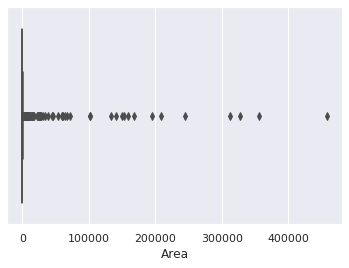

In [383]:
sns.boxplot(dn.Area);

Production values for smaller Areas under agriculture seem to be missing

In [70]:
val = df.Area.mean()+df.Area.std()

In [71]:
df.Production.isna().sum()

0

In [72]:
df[df.Area <= val].Production.isna().sum()

0

In [73]:
df[df.Area <= val].Production.isna().sum()/3727

0.0

In [388]:
val

49261.79537916354

### dealing with missing values

In [19]:
df.dropna(inplace = True)

In [126]:
df.shape

(241484, 7)

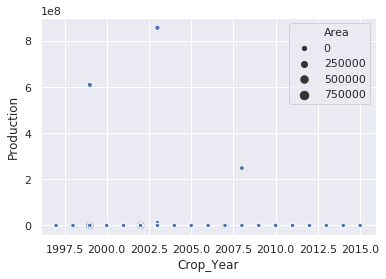

In [14]:
sns.scatterplot('Crop_Year', 'Production',data = df.sample(2500), size = 'Area');

## Yearly trend

In [14]:
tb = df.groupby('Crop_Year')

In [19]:
tb.count()

,State_Name,District_Name,Season,Crop,Area,Production
Crop_Year,,,,,,
1997,8608,8608,8608,8608,8608,8608
1998,11130,11130,11130,11130,11130,11130
1999,12411,12411,12411,12411,12411,12411
2000,13523,13523,13523,13523,13523,13523
2001,13260,13260,13260,13260,13260,13260
2002,16502,16502,16502,16502,16502,16502
2003,17092,17092,17092,17092,17092,17092
2004,13843,13843,13843,13843,13843,13843
2005,13506,13506,13506,13506,13506,13506


In [20]:
s = tb.sum().drop([2015], axis = 0)

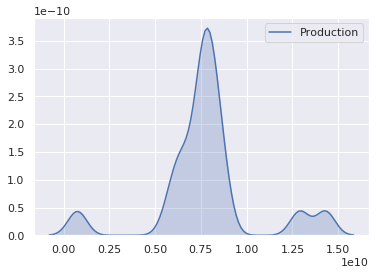

In [394]:
sns.kdeplot(data = s.Production, shade = True);

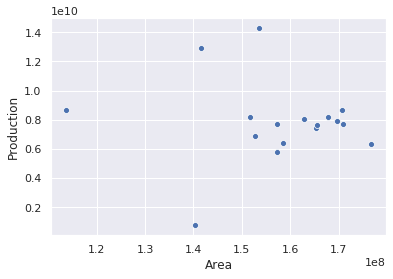

In [395]:
sns.scatterplot(s.Area, s.Production);

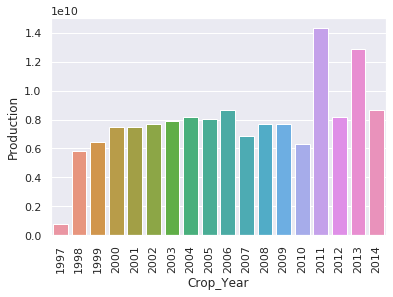

In [396]:
sns.barplot(x = s.index, y = 'Production', data = s);
plt.xticks(rotation = 90);

Marginally high production in Years 2011 and 2013 and very low in year 1997

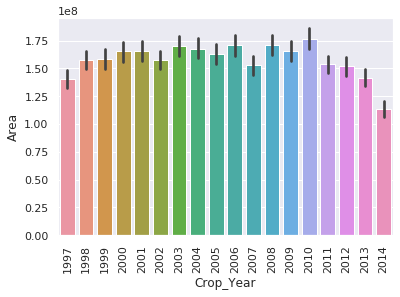

In [397]:
sns.barplot(x = 'Crop_Year', y = 'Area', data = df[df.Crop_Year != 2015], estimator = np.sum);
plt.xticks(rotation = 90);

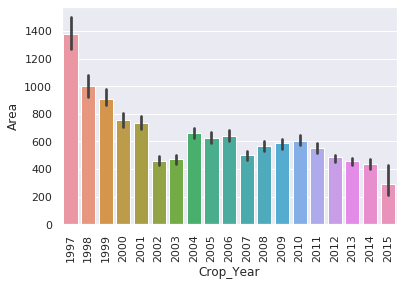

In [76]:
sns.barplot(x = 'Crop_Year', y = 'Area', data = df, estimator = np.median);
plt.xticks(rotation = 90);

In [398]:
efficiency = s.Production/s.Area

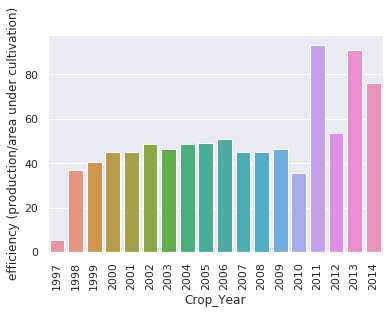

In [399]:
sns.barplot(x = efficiency.index, y = efficiency.values);
plt.xticks(rotation = 90);
plt.ylabel('efficiency (production/area under cultivation)');

years to lookout for 1997-1998, 2009-2014

the top 5 crops over the years in terms of production 

In [15]:
t = df.groupby(['Crop_Year','Crop'])

In [16]:
s = t.sum()

In [181]:
sm = t.mean()

In [17]:
s.reset_index(inplace = True)
#sm.reset_index(inplace = True)

In [18]:
s.sort_values(by = ['Crop_Year','Production'], ascending = [True,False], inplace = True)

In [184]:
sm.sort_values(by = ['Crop_Year', 'Production'], ascending = [True, False], inplace = True)

In [19]:
s.head()

,Crop_Year,Crop,Area,Production
45,1997,Sugarcane,3482848.0,501229055.0
38,1997,Rice,30706467.0,65848504.0
53,1997,Wheat,25640826.0,63831633.0
35,1997,Potato,941622.0,14095119.0
33,1997,Paddy,7885677.0,12551503.0


### Top crops in terms of production

In [20]:
top5crops = s.groupby(["Crop_Year"]).head(5)

In [21]:
tb = pd.pivot_table(top5crops, index = 'Crop_Year', columns = 'Crop', values = 'Production', aggfunc = np.sum)

In [22]:
tb.columns

Index(['Coconut', 'Cotton(lint)', 'Maize', 'Moong(Green Gram)', 'Paddy',
       'Potato', 'Rice', 'Sugarcane', 'Wheat'],
      dtype='object', name='Crop')

In [23]:
tb.drop([1997, 2015], axis = 0, inplace = True)

In [24]:
tb.drop(["Maize", "Moong(Green Gram)","Paddy"], axis = 1, inplace = True)

In [36]:
tb

Crop,Coconut,Cotton(lint),Potato,Rice,Sugarcane,Wheat
Crop_Year,,,,,,
1998,5.283860e+09,NaN,20042976.00,7.876122e+07,2.598091e+08,69699079.00
1999,5.859817e+09,NaN,21777579.00,7.791707e+07,2.940924e+08,75068369.00
2000,6.880409e+09,NaN,20332883.90,8.309270e+07,2.961173e+08,69487129.90
2001,6.881287e+09,NaN,22344741.30,9.005787e+07,2.965126e+08,72648945.90
2002,7.150889e+09,NaN,22214426.06,7.145340e+07,2.870916e+08,65760625.34
2003,7.355743e+09,NaN,22304309.16,8.783597e+07,2.397903e+08,72780554.81
2004,7.663984e+09,NaN,21971368.94,8.417252e+07,2.299085e+08,69567075.35
2005,7.453185e+09,NaN,22600047.10,8.958719e+07,2.857609e+08,67305067.70
2006,8.092567e+09,20890976.0,NaN,9.167629e+07,2.687416e+08,77294678.30


In [37]:
tb.dropna(axis = 1, inplace = True)

In [38]:
tb

Crop,Coconut,Rice,Sugarcane,Wheat
Crop_Year,,,,
1998,5.283860e+09,7.876122e+07,2.598091e+08,69699079.00
1999,5.859817e+09,7.791707e+07,2.940924e+08,75068369.00
2000,6.880409e+09,8.309270e+07,2.961173e+08,69487129.90
2001,6.881287e+09,9.005787e+07,2.965126e+08,72648945.90
2002,7.150889e+09,7.145340e+07,2.870916e+08,65760625.34
2003,7.355743e+09,8.783597e+07,2.397903e+08,72780554.81
2004,7.663984e+09,8.417252e+07,2.299085e+08,69567075.35
2005,7.453185e+09,8.958719e+07,2.857609e+08,67305067.70
2006,8.092567e+09,9.167629e+07,2.687416e+08,77294678.30


In [421]:
temp = tb.loc[2000,:]
temp = temp.T

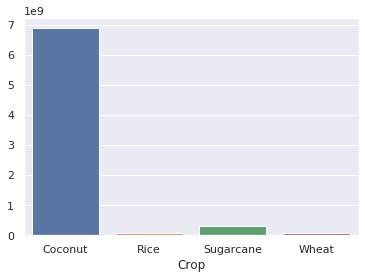

In [425]:
sns.barplot(x = temp.index, y = temp.values);

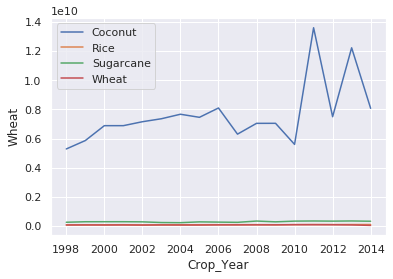

In [426]:
fig = plt.gcf()
crops = tb.columns
for crop in crops:
    sns.lineplot(x = tb.index, y = crop, data = tb);
plt.legend(crops);

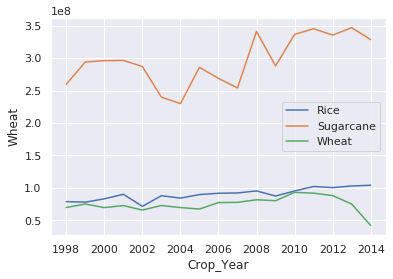

In [25]:
fig = plt.gcf()
crops = ["Rice", "Sugarcane", "Wheat"]
for crop in crops:
    sns.lineplot(x = tb.index, y = crop, data = tb);
plt.legend(crops);

### coconut sugarcane production

In [78]:
coco_sugar_prod = df[(df.Crop == 'Coconut') | (df.Crop == 'Sugarcane')]

In [79]:
coco_sugar_prod.Crop.unique()

array(['Coconut', 'Sugarcane'], dtype=object)

In [80]:
coco_sugar_prod.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.0,64430000.0
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,1.0
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.0,67490000.0


In [101]:
t = coco_sugar_prod.groupby(['Crop_Year','Crop']).sum()
t.reset_index(inplace = True)

In [91]:
t.sample(3)

,Crop_Year,Crop,Area,Production
36,2015,Sugarcane,8962.00,577157.2
31,2012,Sugarcane,4926975.00,335499448.9
21,2007,Sugarcane,3857409.83,254059919.7


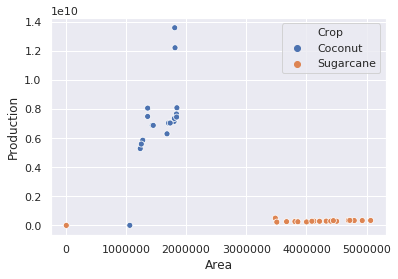

In [102]:
sns.scatterplot(x = 'Area', y = 'Production', data = t, hue = 'Crop');

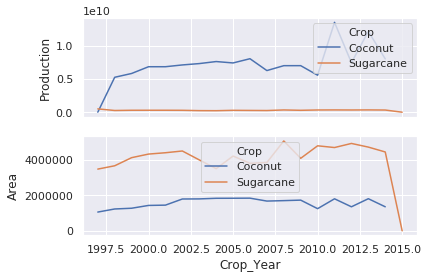

In [99]:
fig, ax = plt.subplots(2, sharex = True)
sns.lineplot(x = 'Crop_Year', y = 'Production', hue = 'Crop', data = t, ax = ax[0]);
sns.lineplot(x = 'Crop_Year', y = 'Area', hue = 'Crop', data = t, ax = ax[1]);

In [81]:
c = pd.pivot_table(coco_sugar_prod, index = 'Crop_Year', columns = 'Crop', values = 'Production', aggfunc = np.sum)

In [43]:
c.head()

Crop,Coconut,Sugarcane
Crop_Year,,
1997,6.344142e+06,501229055.0
1998,5.283860e+09,259809110.0
1999,5.859817e+09,294092445.8
2000,6.880409e+09,296117297.3
2001,6.881287e+09,296512607.1


In [44]:
c.drop([2015], inplace = True)

In [45]:
c.shape

(18, 2)

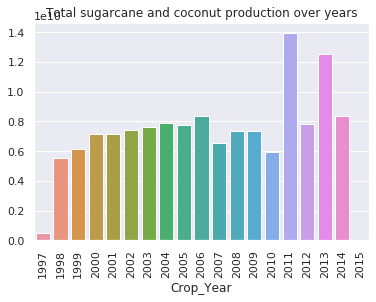

In [82]:
sns.barplot(x = c.index, y = c.sum(axis = 1));
plt.xticks(rotation = 90);
plt.title('Total sugarcane and coconut production over years');

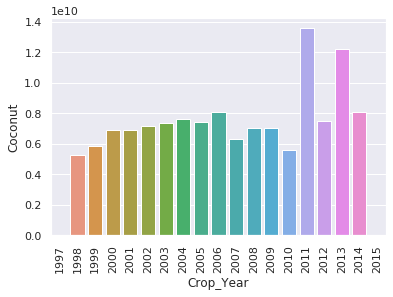

In [107]:
sns.barplot(x = c.index, y = 'Coconut', data = c, estimator = np.sum);
plt.xticks(rotation = 90);

In [112]:
temp = s.groupby("Crop_Year").sum()
temp.drop([2015], axis = 0, inplace = True)
rel = c.Sugarcane / (temp.Production - c.Coconut)

In [113]:
rel

Crop_Year
1997    0.666184
1998    0.485381
1999    0.511634
2000    0.520178
2001    0.507545
2002    0.525787
2003    0.426528
2004    0.437545
2005    0.483891
2006    0.456022
2007    0.438413
2008    0.503808
2009    0.465684
2010    0.473068
2011    0.483305
2012    0.495869
2013    0.506833
2014    0.553858
2015         NaN
dtype: float64

In [114]:
rel_other = 1 - rel

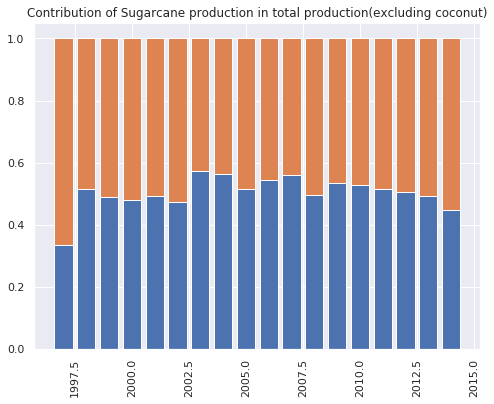

In [115]:
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.bar(rel.index, height = rel_other);
plt.bar(rel.index, height = rel, bottom = rel_other);
plt.xticks(rotation = 90);
plt.title('Contribution of Sugarcane production in total production(excluding coconut)');

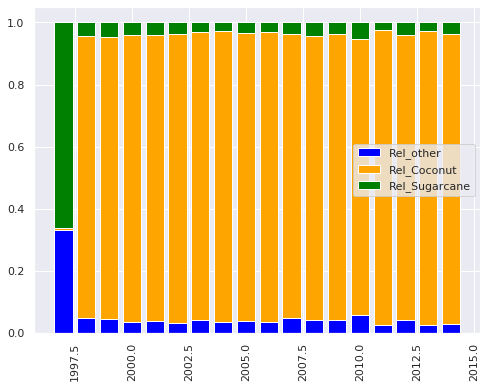

In [455]:
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.bar(c.index, height = rel_other, color = 'blue');
plt.bar(c.index, height = c.Coconut / temp.Production, bottom = rel_other, color = 'orange');
plt.bar(c.index, height = c.Sugarcane / temp.Production, bottom = c.Coconut/temp.Production + rel_other, color = 'green');
plt.xticks(rotation = 90);
plt.legend(['Rel_other','Rel_Coconut', 'Rel_Sugarcane']);
#plt.title('Contribution of Coconut+Sugarcane production in total production');

### excluding coconut and sugarcane production

In [49]:
d = s[(s.Crop != 'Coconut') & (s.Crop != 'Sugarcane')]

In [50]:
d = d[d.Crop_Year != 2015]
d.shape

(1101, 4)

In [51]:
d.sort_values(['Crop_Year','Production'], ascending = [True, False], inplace = True)

In [52]:
d.head()

,Crop_Year,Crop,Area,Production
38,1997,Rice,30706467.0,65848504.0
53,1997,Wheat,25640826.0,63831633.0
35,1997,Potato,941622.0,14095119.0
33,1997,Paddy,7885677.0,12551503.0
11,1997,Cotton(lint),5230253.0,10443524.0


In [53]:
top5crops = d.groupby(['Crop_Year']).head()

In [461]:
top5crops.head()

,Crop_Year,Crop,Area,Production
38,1997,Rice,30706467.0,65848504.0
53,1997,Wheat,25640826.0,63831633.0
35,1997,Potato,941622.0,14095119.0
33,1997,Paddy,7885677.0,12551503.0
11,1997,Cotton(lint),5230253.0,10443524.0


In [54]:
tb = pd.pivot_table(data = top5crops, index = 'Crop_Year', columns = 'Crop', values = 'Production', aggfunc = np.sum)

In [55]:
tb.drop([1997], axis = 0, inplace = True)

In [56]:
tb.drop(["Jute", "Paddy"], axis = 1, inplace = True)

In [57]:
tb

Crop,Cotton(lint),Maize,Potato,Rice,Wheat
Crop_Year,,,,,
1998,11167120.0,10038590.00,20042976.00,7.876122e+07,69699079.00
1999,10641844.0,11245483.00,21777579.00,7.791707e+07,75068369.00
2000,NaN,11977311.20,20332883.90,8.309270e+07,69487129.90
2001,NaN,12669242.50,22344741.30,9.005787e+07,72648945.90
2002,NaN,11021981.25,22214426.06,7.145340e+07,65760625.34
2003,13623687.0,14638847.57,22304309.16,8.783597e+07,72780554.81
2004,16974350.0,13823196.47,21971368.94,8.417252e+07,69567075.35
2005,18388534.5,13775161.56,22600047.10,8.958719e+07,67305067.70
2006,20890976.0,14245663.50,19565118.70,9.167629e+07,77294678.30


cotton has been among the top crops except for years [2000, 2001, 2002]

In [59]:
t = s[s.Crop == 'Cotton(lint)']
t = t.groupby(['Crop_Year']).sum()

In [67]:
tb.loc[2000:2002, ['Cotton(lint)']] = t.loc[2000:2002, ['Production']].values

In [68]:
tb

Crop,Cotton(lint),Maize,Potato,Rice,Wheat
Crop_Year,,,,,
1998,11167120.0,10038590.00,20042976.00,7.876122e+07,69699079.00
1999,10641844.0,11245483.00,21777579.00,7.791707e+07,75068369.00
2000,9154973.0,11977311.20,20332883.90,8.309270e+07,69487129.90
2001,9835595.0,12669242.50,22344741.30,9.005787e+07,72648945.90
2002,8561894.2,11021981.25,22214426.06,7.145340e+07,65760625.34
2003,13623687.0,14638847.57,22304309.16,8.783597e+07,72780554.81
2004,16974350.0,13823196.47,21971368.94,8.417252e+07,69567075.35
2005,18388534.5,13775161.56,22600047.10,8.958719e+07,67305067.70
2006,20890976.0,14245663.50,19565118.70,9.167629e+07,77294678.30


In [1]:
cmap = plt.get_cmap('tab10')

NameError: name 'plt' is not defined

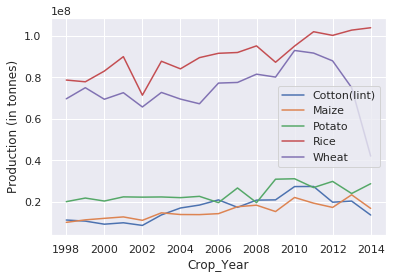

In [116]:
crops = tb.columns
fig = plt.gcf()
for crop in crops:
    sns.lineplot(x = tb.index, y = crop, data = tb);
plt.legend(crops);
plt.ylabel('Production (in tonnes)');

### efficiency of top crops across years

In [119]:
s.shape

(1154, 4)

In [194]:
s = s.groupby('Crop').rolling(4).mean()

In [196]:
s.reset_index(inplace = True)

In [198]:
s.dropna(inplace = True)

In [199]:
s

,Crop,level_1,Crop_Year,Area,Production
6,Arecanut,167,1998.5,250208.7500,405244.5000
7,Arecanut,226,1999.5,266930.2500,421602.0000
8,Arecanut,287,2000.5,247145.2500,268052.2500
9,Arecanut,390,2001.5,291585.5000,331178.2500
10,Arecanut,490,2002.5,286020.0925,328031.5125
...,...,...,...,...,...
1149,other oilseeds,859,2008.5,388532.5000,153797.7250
1150,other oilseeds,920,2009.5,408936.5000,424454.1750
1151,other oilseeds,988,2010.5,382603.0000,414560.2500
1152,other oilseeds,1064,2011.5,384573.7500,732102.2500


In [156]:
crops1 = ['Coconut'] 
crops2 = ['Potato','Sugarcane']
crops3 = ['Cotton(lint)','Maize','Rice','Wheat']

In [204]:
st = s[s.Crop.isin(crops2)]

In [205]:
st['eff'] = st.Production / st.Area

/usr/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


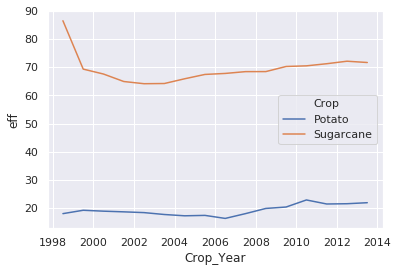

In [206]:
sns.lineplot(x = 'Crop_Year', y = 'eff', data = st[st.Crop_Year != 2015], hue = 'Crop');

### Low producing crops

In [221]:
lowprod5 = s.groupby(["Crop_Year"]).tail(10)

In [222]:
lowprod5.Crop.unique()

array(['Moth', 'Korra', 'Coriander', 'Samai', 'Sannhamp', 'Niger seed',
       'Safflower', 'Cardamom', 'Varagu', 'Kapas', 'Khesari', 'Blackgram',
       'other oilseeds', 'Black pepper', 'Jute & mesta',
       'Other Cereals & Millets', 'Cond-spcs other', 'Tea',
       'other misc. pulses', 'Coffee', 'Pear', 'Peas  (vegetable)',
       'Plums', 'Pome Granet', 'Pump Kin', 'Ribed Guard', 'Snak Guard',
       'Water Melon', 'Yam', 'other fibres', 'Cashewnut',
       'Other  Rabi pulses', 'Linseed', 'Peas & beans (Pulses)',
       'Other Kharif pulses', 'Cowpea(Lobia)', 'Ginger', 'Mango',
       'Brinjal', 'Cabbage', 'Drum Stick', 'Grapes', 'Ricebean (nagadal)',
       'Bean', 'Lentil', 'Perilla', 'Jobster', 'Urad', 'Horse-gram',
       'Rapeseed &Mustard', 'Sesamum', 'Soyabean', 'Small millets',
       'Jute', 'Wheat', 'Barley'], dtype=object)

In [223]:
tb = pd.pivot_table(lowprod5, index = 'Crop_Year', values = 'Production', columns = 'Crop')

In [224]:
tb.isna().sum()

Crop
Barley                     18
Bean                       17
Black pepper               10
Blackgram                  13
Brinjal                    18
Cabbage                    17
Cardamom                    4
Cashewnut                  16
Coffee                     18
Cond-spcs other            18
Coriander                  17
Cowpea(Lobia)              15
Drum Stick                 16
Ginger                     18
Grapes                     16
Horse-gram                 18
Jobster                    18
Jute                       18
Jute & mesta               16
Kapas                      16
Khesari                    18
Korra                      14
Lentil                     17
Linseed                    12
Mango                      17
Moth                       11
Niger seed                  9
Other  Rabi pulses         14
Other Cereals & Millets     9
Other Kharif pulses        17
Pear                       17
Peas  (vegetable)          17
Peas & beans (Pulses)      16
Peril

## Category of crops

In [14]:
df.Crop.unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garli

In [94]:
spices = ['Dry ginger','Black pepper','Dry chillies','Turmeric','Coriander','Garlic','Ginger','Cardamom']
vegetables = ['Sweet potato','Tapioca','Onion','Potato','Beans & Mutter(Vegetable)','Bhindi','Brinjal','Cucumber',
             'Cabbage','Peas  (vegetable)','Bottle Gourd','Carrot','Bitter Gourd',
             'Bean']
fruits = ['Banana','Citrus Fruit','Grapes','Mango','Orange','Papaya','Pome Fruit','Lemon','Pome Granet','Tomato',
         'Jack Fruit','Pineapple','Apple','Peach','Pear','Litchi','Ber','Water Melon','Pump Kin']
pulses = ['Moong(Green Gram)', 'Urad','Arhar/Tur','Horse-gram','Gram','Masoor','Moth','Peas & beans (Pulses)',
         'Lentil','Blackgram','Khesari']
cereals = ['Rice','Maize','Bajra','Jowar','Wheat','Small millets','Ragi','Korra','Samai','Barley']
oilseeds = ['Coconut','Groundnut','Sunflower','Castor seed', 'Linseed','Rapeseed &Mustard','Sesamum']
cash_crops = ['Arecanut','Cashewnut','Sugarcane','Cotton(lint)','Tobacco','Tea', 'Coffee','Jute','Cashewnut Processes',
             'Cashewnut Raw','Jute & Mesta','Rubber','Mesta']

In [46]:
crop = []
crop.extend(spices)
crop.extend(vegetables)
crop.extend(fruits)
crop.extend(cereals)
crop.extend(oilseeds)
crop.extend(cash_crops)
crop.extend(pulses)
print(len(crop))

82


In [20]:
crop

['Dry ginger',
 'Black pepper',
 'Dry chillies',
 'Turmeric',
 'Coriander',
 'Garlic',
 'Ginger',
 'Khesari',
 'Cardamom',
 'Sweet potato',
 'Tapioca',
 'Onion',
 'Potato',
 'Beans & Mutter(Vegetable)',
 'Bhindi',
 'Brinjal',
 'Cucumber',
 'Cabbage',
 'Peas  (Vegetable)',
 'Banana',
 'Citrus Fruit',
 'Grapes',
 'Mango',
 'Orange',
 'Papaya',
 'Pome fruit',
 'Lemon',
 'Pome Granet',
 'Tomato',
 'Rice',
 'Maize',
 'Bajra',
 'Jowar',
 'Wheat',
 'Small millets',
 'Ragi',
 'Korra',
 'Samai',
 'Coconut',
 'Groundnut',
 'Sunflower',
 'Castor seed',
 'Arecanut',
 'Cashewnut',
 'Sugarcane',
 'Cotton(lint)',
 'Tobacco',
 'Moong(Green Gram)',
 'Urad',
 'Arhar/Tur',
 'Horse-gram',
 'Gram',
 'Masoor']

In [47]:
for c in df.Crop.unique():
    if c not in crop:
        if 'other' not in c.lower():
            print(c)

Safflower
Soyabean
Cowpea(Lobia)
Sapota
Niger seed
Varagu
Paddy
Sannhamp
Guar seed
Turnip
Redish
Arcanut (Processed)
Atcanut (Raw)
Cashewnut Processed
Drum Stick
Snak Guard
Cauliflower
Kapas
Colocosia
Jobster
Perilla
Rajmash Kholar
Ricebean (nagadal)
Ash Gourd
Beet Root
Lab-Lab
Ribed Guard
Yam
Plums
Jute & mesta


In [95]:
spice = df[df.Crop.isin(spices)]

In [96]:
spice.shape

(21612, 7)

In [97]:
spice.Crop.unique()

array(['Dry ginger', 'Black pepper', 'Dry chillies', 'Turmeric',
       'Coriander', 'Garlic', 'Ginger', 'Cardamom'], dtype=object)

In [98]:
spice.sample(3)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
244341,West Bengal,MURSHIDABAD,1998,Whole Year,Turmeric,1920.0,4445.0
73976,Jammu and Kashmir,ANANTNAG,2000,Whole Year,Dry chillies,31.0,37.0
30884,Bihar,DARBHANGA,1997,Whole Year,Dry chillies,97.0,65.0


In [99]:
s = spice.groupby(['State_Name','Crop']).sum()

In [100]:
s.reset_index(inplace = True)

In [101]:
s.sort_values(by = ['Crop','Production'], ascending = [True, False], inplace = True)

In [102]:
s['eff'] = s.Production/s.Area

In [103]:
s.State_Name.unique()

array(['Kerala', 'Karnataka', 'Assam', 'Tamil Nadu', 'Meghalaya', 'Goa',
       'Andaman and Nicobar Islands', 'Puducherry', 'West Bengal',
       'Nagaland', 'Rajasthan', 'Madhya Pradesh', 'Andhra Pradesh',
       'Odisha', 'Telangana', 'Uttar Pradesh', 'Bihar', 'Chhattisgarh',
       'Haryana', 'Himachal Pradesh', 'Dadra and Nagar Haveli',
       'Jammu and Kashmir', 'Gujarat', 'Arunachal Pradesh', 'Manipur',
       'Uttarakhand'], dtype=object)

In [104]:
s.sort_values(by = ['Crop','eff'], ascending = [True, False], inplace = True)

In [105]:
s

,State_Name,Crop,Crop_Year,Area,Production,eff
49,Karnataka,Black pepper,457407,277466.00,756941.80,2.728052
13,Assam,Black pepper,432260,26450.00,41063.00,1.552476
86,Puducherry,Black pepper,28063,166.00,103.00,0.620482
70,Meghalaya,Black pepper,128675,7366.00,4510.00,0.612273
56,Kerala,Black pepper,505386,3090755.93,971530.11,0.314334
...,...,...,...,...,...,...
27,Chhattisgarh,Turmeric,513955,13726.00,12288.00,0.895235
17,Assam,Turmeric,910657,234725.00,180527.00,0.769100
69,Manipur,Turmeric,88095,2667.00,1884.00,0.706412
66,Madhya Pradesh,Turmeric,838685,562057.00,388487.02,0.691188


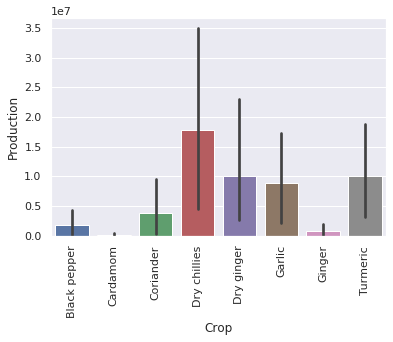

In [106]:
sns.barplot(x = 'Crop', y = 'Production', data = s, estimator = np.sum);
plt.xticks(rotation = 90);

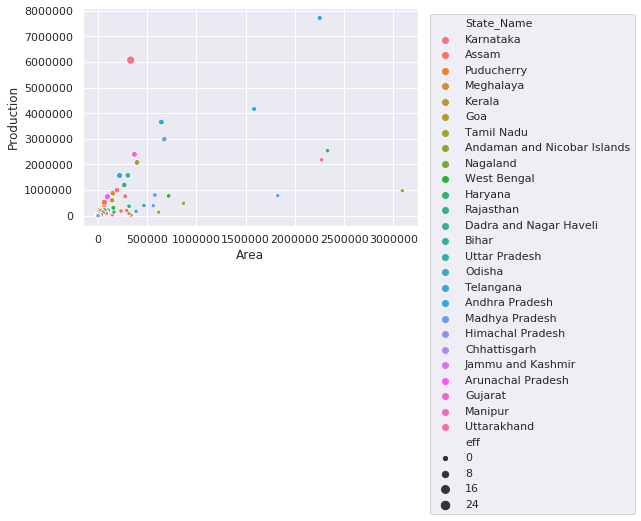

In [107]:
#area vs production under spices across states
sns.scatterplot(x = 'Area', y = 'Production', data = s, hue = 'State_Name', size = 'eff', estimator = np.sum);
plt.legend(bbox_to_anchor = (1.02,1));

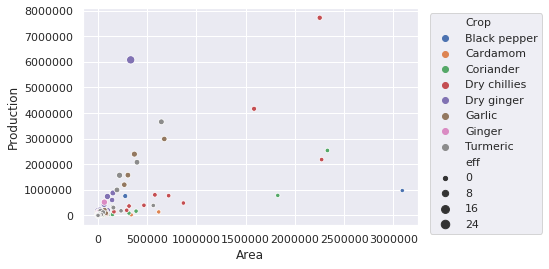

In [108]:
#area vs production under spices
sns.scatterplot(x = 'Area', y = 'Production', data = s, hue = 'Crop', size = 'eff', estimator = np.mean);
plt.legend(bbox_to_anchor = (1.02,1));

In [109]:
px.scatter(s, x = 'Area', y = 'Production', animation_frame = 'Crop',
          animation_group = 'State_Name', size = 'eff', color = 'State_Name')

### top states in terms of production of spices

In [110]:
per75_area = np.quantile(s.Area, [0.75])
per75_prod = np.quantile(s.Production, [0.75])

In [111]:
print(per75_area, per75_prod)

[152057.] [202062.]


In [112]:
topstates = s[(s.Production > per75_prod[0])|(s.Area > per75_area[0])]

In [113]:
topstates.head()

,State_Name,Crop,Crop_Year,Area,Production,eff
49,Karnataka,Black pepper,457407,277466.00,756941.80,2.728052
56,Kerala,Black pepper,505386,3090755.93,971530.11,0.314334
57,Kerala,Cardamom,210637,617554.00,136342.00,0.220777
50,Karnataka,Cardamom,226629,338207.00,23351.00,0.069044
91,Rajasthan,Coriander,755553,2330651.00,2537778.00,1.088871


In [114]:
topstates.drop(['Crop_Year'], axis = 1, inplace = True)

/usr/anaconda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
topstates.State_Name.value_counts()

Karnataka            5
Madhya Pradesh       5
Assam                4
Tamil Nadu           3
Andhra Pradesh       3
Rajasthan            3
Kerala               3
West Bengal          3
Telangana            2
Odisha               2
Bihar                1
Arunachal Pradesh    1
Gujarat              1
Uttar Pradesh        1
Meghalaya            1
Chhattisgarh         1
Name: State_Name, dtype: int64

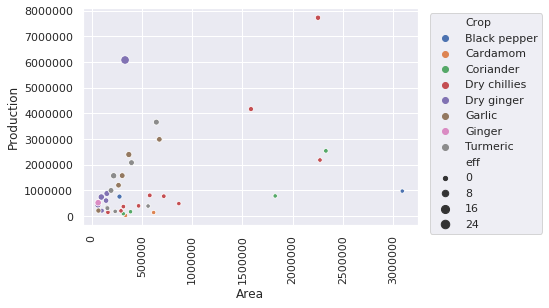

In [115]:
sns.scatterplot(x = 'Area', y = 'Production', data = topstates, hue = 'Crop', estimator = np.mean, size = 'eff');
plt.xticks(rotation = 90);
plt.legend(bbox_to_anchor=(1.02,1));

In [116]:
#top states across each crop
tb = pd.pivot_table(topstates, index = ['State_Name'], values = 'Production', columns = 'Crop', aggfunc = np.sum)

In [117]:
tb.style

Crop,Black pepper,Cardamom,Coriander,Dry chillies,Dry ginger,Garlic,Ginger,Turmeric
State_Name,,,,,,,,
Andhra Pradesh,nan,nan,166376.000000,7721555.000000,nan,nan,nan,1568134.000000
Arunachal Pradesh,nan,nan,nan,nan,739471.000000,nan,nan,nan
Assam,nan,nan,nan,202062.000000,431432.000000,nan,518074.000000,180527.000000
Gujarat,nan,nan,nan,157200.000000,nan,2394300.000000,nan,nan
Karnataka,756941.800000,23351.000000,nan,2181071.000000,6076419.900000,nan,nan,995598.000000
Kerala,971530.110000,136342.000000,nan,nan,601093.820000,nan,nan,nan
Madhya Pradesh,nan,nan,781843.020000,804394.010000,nan,2986350.000000,nan,388487.020000
Meghalaya,nan,nan,nan,nan,877024.000000,nan,nan,nan
Odisha,nan,nan,nan,395380.000000,nan,211908.000000,nan,327938.000000


### contribution of different spices across years

In [120]:
s = spice.groupby(['Crop','Crop_Year']).sum()

In [124]:
s.reset_index(inplace = True)

In [125]:
tb = pd.pivot_table(s, index = 'Crop', columns = 'Crop_Year', values = 'Production')

In [139]:
tb.style.background_gradient(cmap = 'Oranges', axis = 1)

/usr/anaconda/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning:

invalid value encountered in less



Crop_Year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Crop,,,,,,,,,,,,,,,,,,
Black pepper,57204.000000,79379.000000,63684.000000,78971.000000,80436.000000,90660.000000,93637.230000,103300.220000,121050.050000,94520.000000,97965.000000,114277.000000,121113.000000,63163.570000,50201.340000,128544.000000,106726.000000,239403.000000
Cardamom,1701.000000,7144.000000,8528.000000,8916.000000,9084.000000,10487.000000,11163.000000,10171.700000,12044.000000,12470.000000,9511.000000,11766.000000,9397.000000,1550.000000,2699.000000,11800.000000,15882.000000,17429.000000
Coriander,13169.000000,199226.000000,209609.000000,228107.000000,304873.000000,166344.110000,383956.010000,253312.000000,168992.000000,225518.000000,223921.100000,362266.000000,386824.000000,304370.000000,89127.000000,95047.000000,113840.000000,26616.000000
Dry chillies,618764.000000,857038.000000,932081.000000,910118.000000,932870.000000,812634.710000,1168856.000000,1114208.000000,805665.700000,1103407.000000,1135128.500000,1120759.000000,1058262.000000,958872.000000,1073377.000000,775380.000000,1181768.000000,1153065.300000
Dry ginger,69027.000000,210103.000000,285932.000000,344098.000000,363052.000000,358976.100000,331064.600000,385722.000000,513899.100000,479300.000000,605306.700000,1166719.000000,1715891.000000,481720.360000,287321.360000,691246.000000,708261.000000,1048689.900000
Garlic,146910.000000,262203.000000,440495.000000,155232.000000,230515.000000,258432.000000,508230.000000,622352.000000,461115.000000,655956.000000,806270.700000,757611.000000,626318.000000,555389.000000,789084.000000,647729.000000,658224.100000,206708.000000
Ginger,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,38669.000000,170999.000000,187444.000000,185586.700000,239227.000000
Turmeric,175614.000000,202331.000000,292438.000000,683428.000000,401082.000000,843406.020000,525885.000000,670866.000000,759277.100000,687876.030000,314503.300000,716910.000000,647359.000000,573218.390000,1056287.540000,295269.000000,634554.700000,485938.400000


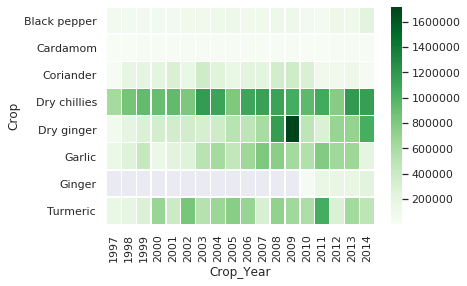

In [141]:
sns.heatmap(tb, cmap = 'Greens', linewidths = 0.3);

In [146]:
temp = tb.T
temp['tot'] = temp.sum(axis = 1)

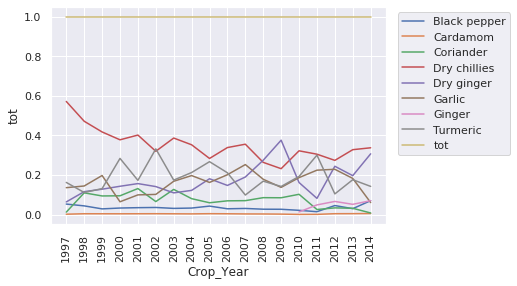

In [148]:
crops = temp.columns
fig = plt.gcf()
for crop in crops:
    sns.lineplot(x = temp.index, y = temp[crop]/temp.tot);
plt.xticks(temp.index, rotation = 90);
plt.legend(crops, bbox_to_anchor = (1.02,1));

In [ ]:
pd.melt()

In [129]:
s_ = spice.groupby(['Crop_Year']).sum()

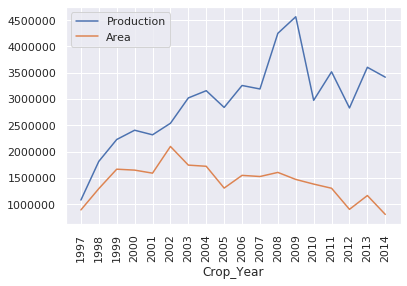

In [143]:
sns.lineplot(s_.index, y = 'Production', data= s_);
sns.lineplot(s_.index, y = 'Area', data = s_);
plt.ylabel('');
plt.xticks(s_.index, rotation = 90);
plt.legend(['Production','Area']);

In [26]:
for state in states:
    if state not in states_spice:
        print(state)

Chandigarh
Jharkhand
Maharashtra
Mizoram
Punjab
Sikkim
Tripura


In [131]:
s = spice.groupby(['Crop','Crop_Year']).sum()

In [132]:
s.reset_index(inplace = True)

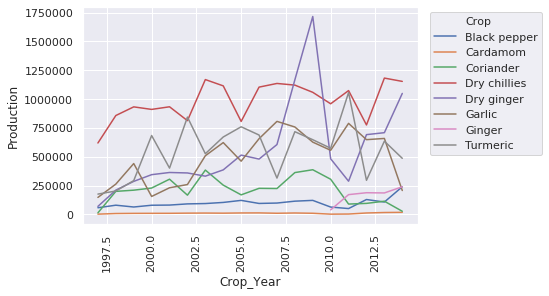

In [133]:
sns.lineplot(x = 'Crop_Year', y = 'Production', data = s, hue = 'Crop');
plt.xticks(rotation = 90);
plt.legend(bbox_to_anchor = (1.02,1));

In [134]:
s = s.groupby('Crop').rolling(4).mean()

In [135]:
s.reset_index(inplace = True)

In [136]:
s.dropna(inplace = True)

In [137]:
s

,Crop,level_1,Crop_Year,Area,Production
3,Black pepper,3,1998.5,196796.7500,69809.5000
4,Black pepper,4,1999.5,204932.0000,75617.5000
5,Black pepper,5,2000.5,212473.7500,78437.7500
6,Black pepper,6,2001.5,219043.6250,85926.0575
7,Black pepper,7,2002.5,229326.3750,92008.3625
...,...,...,...,...,...
126,Turmeric,126,2008.5,115395.1950,562997.6725
127,Turmeric,127,2009.5,145664.3075,748443.7325
128,Turmeric,128,2010.5,125642.3075,643033.4825
129,Turmeric,129,2011.5,127892.3075,639832.4075


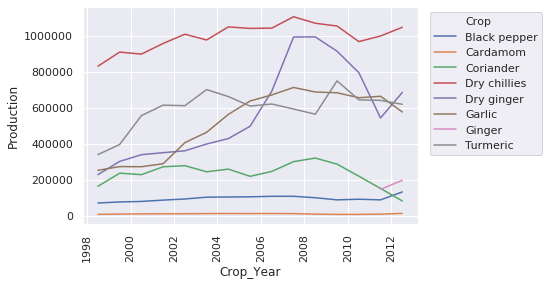

In [138]:
sns.lineplot(x = 'Crop_Year', y = 'Production', data = s, hue = 'Crop');
plt.xticks(rotation = 90);
plt.legend(bbox_to_anchor = (1.02,1));

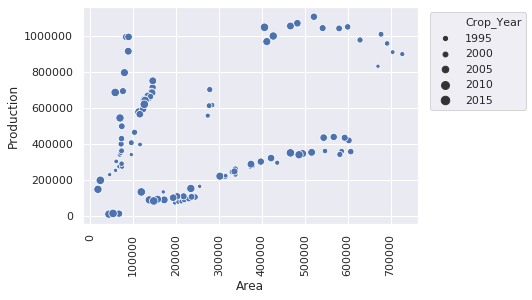

In [46]:
sns.scatterplot('Area','Production', data = s, size = 'Crop_Year');
plt.xticks(rotation = 90);
plt.legend(bbox_to_anchor = (1.02,1));

In [61]:
px.scatter(s, x = 'Area', y = 'Production', animation_frame = 'Crop_Year',
          animation_group = 'Crop', size = 'Production', color = 'Crop')

### Whole Year : Season

In [20]:
wy = df[df.Season == 'Whole Year']

In [21]:
wy.shape

(55582, 7)

In [22]:
wy.sample(4)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
139223,Meghalaya,EAST GARO HILLS,2002,Whole Year,Dry chillies,328.0,196.0
114494,Madhya Pradesh,MANDLA,2009,Whole Year,Sugarcane,1227.0,29580.0
244884,West Bengal,NADIA,1997,Whole Year,Barley,123.0,120.0
18607,Assam,GOLAGHAT,2007,Whole Year,Turmeric,388.0,116.0


In [25]:
states = df.State_Name.unique()

In [26]:
st = wy.State_Name.unique()

In [27]:
for state in states:
    if state not in st:
        print(state)

Dadra and Nagar Haveli


In [29]:
len(wy.District_Name.unique())

613